<a href="https://colab.research.google.com/github/ShubhamGupta2505/MachineLearningPractice/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FuelConsumption.csv']))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


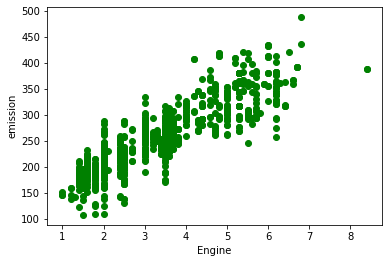

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.xlabel("Engine")
plt.ylabel("emission")
plt.show()

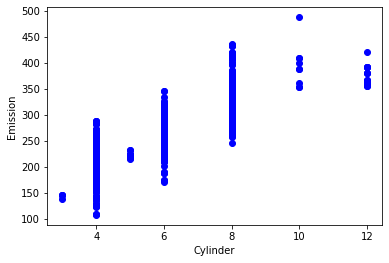

In [15]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color ='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [16]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [17]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x ,train_y)
print("Coefficients :",regression.coef_)

Coefficients : [[10.93061692  7.61854659  9.65653298]]


In [19]:
y_hat = regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


In [21]:
print("Residual Sum of square %.2f" % np.mean((y_hat - test_y) ** 2))
print("Variance score : %.2f" % regression.score(test_x,test_y))

Residual Sum of square 638.09
Variance score : 0.85


MULTIPLE LINEAR REGRESSION ON DIFFERENT PARAMETERS          
Taking Fuelconsunptio_city and Fuelconsumption_hwy instead of FuelConsumption_COMB to measure accuracy of model 

In [22]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x,train_y)
print("Coefficients :",regression.coef_)

Coefficients : [[10.92521982  7.63694526  5.26715289  4.40319308]]


In [23]:
y_hat_ = regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_x_ = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y_ = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual Sum of Squares : %.2f" % np.mean((y_hat_ - test_y_) ** 2))
print("Variance Score %.2f" % regression.score(test_x_,test_y_))

Residual Sum of Squares : 638.57
Variance Score 0.84
